## Семинар 11 - Нейросети

Эта часть основана на:
* First part is based on YSDA [Practical RL course week04 materials](https://github.com/yandexdataschool/Practical_RL/tree/master/week04_%5Brecap%5D_deep_learning).
* Second part is based on PyTorch official tutorials and [this kaggle kernel](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader)
* Third part is based on PyTorch tutorial by [Stanford CS 231n course](http://cs231n.stanford.edu)

In [ ]:
!pip install torch torchvision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
print(torch.__version__)

1.10.0+cu111


# 1. Вспомним PyTorch

Эта часть основана на материалах курса [dlschool](https://www.dlschool.org/)

Нахождение сложной производной

Найдите производную по x от функции 
$$\sin\left(\tan(x)\frac{x^2}{y} + \ln(e^{-x^2 + 3}+x^3y)\right)\tan(x^2e^{x^9})$$

При этом надо пользоваться встроенным в PyTorch autograd. Численное вычисление производной может не дать нужный результат.

In [ ]:
def find_x_derivative(x, y):
    # Ваш код здесь

    return 

In [ ]:
find_x_derivative(1,21)

tensor([-9.0207], dtype=torch.float64)

Нахождение косинусной близости

Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.

Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между веткорами удобнее всего через скалярное произведение:
$$\cos(angle(x, y)) = \frac{x \cdot y}{\left\|x\right\| \left\|y\right\|}$$


In [ ]:
def get_cos_sim(A, B):
    """
        A, B - torch float tensors
    """
    # Ваш код здесь
    
    
    return 

In [ ]:
A = [[1, -47, 25, -3], [10, 17, -15, 22], [-3, -7, 26, 36], [12, -27, -42, 0]]
B = [[-50, -13, 1, 10, 1242], [21, 48, -13, -14, -20], [20, 15, 11, 43, 11], [11, 103, 147, 27, -8]]

In [ ]:
torch.mean(get_cos_sim(A, B))

tensor(0.1498)

# Практика: Погружение в глубокое обучение
В семинаре, будем использовать набор данных `fashion_mnist`, загрузим их

In [ ]:
from torchvision import datasets,transforms

In [ ]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, download = True)

In [ ]:
num_classes = len(trainset.classes)

In [ ]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
x_train = trainset.train_data
y_train = trainset.train_labels

x_test = testset.train_data
y_test = testset.train_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


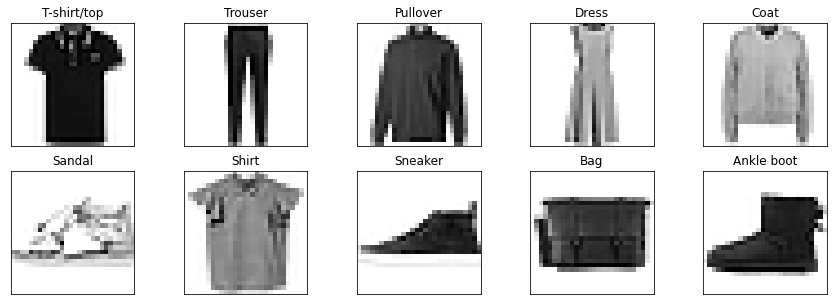

In [ ]:
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(trainset.classes[i])
    plt.imshow(im, cmap='gray_r')
plt.show()

### Проведем небольшие предобработки

In [ ]:
x_train_flat = x_train.flatten(start_dim=1).float()
x_test_flat = x_test.flatten(start_dim=1).float()
print(f'Была размерность: {x_train.shape}, стала: {x_train_flat.shape}')
print(f'Была размерность: {x_test.shape}, стала: {x_test_flat.shape}')

Была размерность: torch.Size([60000, 28, 28]), стала: torch.Size([60000, 784])
Была размерность: torch.Size([10000, 28, 28]), стала: torch.Size([10000, 784])


In [ ]:
D_out =  # Ваш код здесь
D_in = 

## 2 варианта опредления архитектуры нейросети в pyTorch 

(на самом деле их больше)

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, 128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128, 10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10, D_out),
    torch.nn.Softmax(dim=1)
)

In [ ]:
import torch.nn.functional as F

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, 128)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(128, 10)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(10, D_out)
        self.act3 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

model = Model()

In [ ]:
model

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (act3): Softmax(dim=1)
)

In [ ]:
# Forward pass: compute predicted y by passing x to the model. Module objects
# override the __call__ operator so you can call them like functions. When
# doing so you pass a Tensor of input data to the Module and it produces
# a Tensor of output data.
y_pred = model(x_train_flat)

In [ ]:
y_pred.shape

torch.Size([60000, 10])

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Compute and print loss. We pass Tensors containing the predicted and true
# values of y, and the loss function returns a Tensor containing the
# loss.
loss_old = loss_fn(y_pred, y_train)

In [ ]:
acc_old = accuracy_score(y_train.numpy(), y_pred.argmax(dim=1).numpy())
acc_old

0.1

In [ ]:
# Zero the gradients before running the backward pass.
model.zero_grad()

In [ ]:
# Backward pass: compute gradient of the loss with respect to all the learnable
# parameters of the model. Internally, the parameters of each Module are stored
# in Tensors with requires_grad=True, so this call will compute gradients for
# all learnable parameters in the model.
loss_old.backward()

In [ ]:
learning_rate = 1e-2

In [ ]:
# Update the weights using gradient descent. Each parameter is a Tensor, so
# we can access its gradients like we did before.
with torch.no_grad():
  # Ваш код здесь


In [ ]:
y_pred = model(x_train_flat.float())
loss_new = loss_fn(y_pred, y_train)
step = loss_new.item()-loss_old.item()

acc_new = accuracy_score(y_train.numpy(), y_pred.argmax(dim=1).numpy())



print(f'Лосс: {loss_old.item()} -> {loss_new.item()}. Step {step} ')
print(f'Accuracy: {acc_old} -> {acc_new}')

Лосс: 2.302765130996704 -> 2.302751302719116. Step -1.3828277587890625e-05 
Accuracy: 0.1 -> 0.1


In [ ]:
def batch_train(model, loss_fn, learning_rate, x, y):
  # Ваш код здесь
    
    return(loss.item())

In [ ]:
def train(model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
    acc_train_all = []
    loss_train_all = []
    acc_test_all = []
    loss_test_all = []

    for epoch in range(n_epochs):

        permutation = torch.randperm(X.size()[0])

        for i in tqdm(range(0,X.float().size()[0], batch_size)):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X[indices], y[indices]
            batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

        y_test_pred = model(X_test)
        y_train_pred = model(X)


        acc_train = accuracy_score(y.numpy(), y_train_pred.argmax(dim=1).numpy())
        loss_train = loss_fn(y_train_pred, y).detach().numpy() 
        acc_test = accuracy_score(y_test.numpy(), y_test_pred.argmax(dim=1).numpy())
        loss_test = loss_fn(y_test_pred, y_test).detach().numpy()

        acc_train_all = np.append(acc_train_all, acc_train)
        loss_train_all = np.append(loss_train_all, loss_train)
        acc_test_all = np.append(acc_test_all, acc_test)
        loss_test_all = np.append(loss_test_all, loss_test)


        print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')
        
    return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [ ]:
n_epochs = 10
batch_size = 1000 
learning_rate = 1e-1
model = Model()
acc_train_all, loss_train_all, acc_test_all, loss_test_all = \
          train(model, n_epochs, batch_size, learning_rate, x_train_flat, y_train, x_test_flat, y_test)


100%|██████████| 60/60 [00:01<00:00, 31.62it/s]


Epoch 0: 
 Accuracy - train: 0.12965 | test: 0.1261 
 Loss - train: 2.2978880405426025 | test: 2.2979395389556885


100%|██████████| 60/60 [00:01<00:00, 30.39it/s]


Epoch 1: 
 Accuracy - train: 0.17733333333333334 | test: 0.1731 
 Loss - train: 2.2943878173828125 | test: 2.294490337371826


100%|██████████| 60/60 [00:02<00:00, 29.31it/s]


Epoch 2: 
 Accuracy - train: 0.2599666666666667 | test: 0.2552 
 Loss - train: 2.2908413410186768 | test: 2.29097843170166


100%|██████████| 60/60 [00:02<00:00, 28.83it/s]


Epoch 3: 
 Accuracy - train: 0.28036666666666665 | test: 0.2755 
 Loss - train: 2.286875009536743 | test: 2.2870779037475586


100%|██████████| 60/60 [00:02<00:00, 28.21it/s]


Epoch 4: 
 Accuracy - train: 0.28365 | test: 0.28 
 Loss - train: 2.2823081016540527 | test: 2.282585620880127


100%|██████████| 60/60 [00:02<00:00, 27.73it/s]


Epoch 5: 
 Accuracy - train: 0.2844333333333333 | test: 0.2817 
 Loss - train: 2.2768194675445557 | test: 2.2771663665771484


100%|██████████| 60/60 [00:02<00:00, 27.19it/s]


Epoch 6: 
 Accuracy - train: 0.28401666666666664 | test: 0.2815 
 Loss - train: 2.270070791244507 | test: 2.2705039978027344


100%|██████████| 60/60 [00:02<00:00, 27.09it/s]


Epoch 7: 
 Accuracy - train: 0.28225 | test: 0.2796 
 Loss - train: 2.261781930923462 | test: 2.262301445007324


100%|██████████| 60/60 [00:02<00:00, 26.20it/s]


Epoch 8: 
 Accuracy - train: 0.2799 | test: 0.2773 
 Loss - train: 2.2518749237060547 | test: 2.252495050430298


100%|██████████| 60/60 [00:02<00:00, 25.71it/s]


Epoch 9: 
 Accuracy - train: 0.27581666666666665 | test: 0.2727 
 Loss - train: 2.2404778003692627 | test: 2.2412147521972656


In [ ]:
def vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all):
    fig = plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)

    plt.plot(loss_train_all, label='loss')
    plt.plot(loss_test_all, label='val_loss')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train_all, label='acc')
    plt.plot(acc_test_all, label='val_acc')

    plt.legend()
    plt.show()

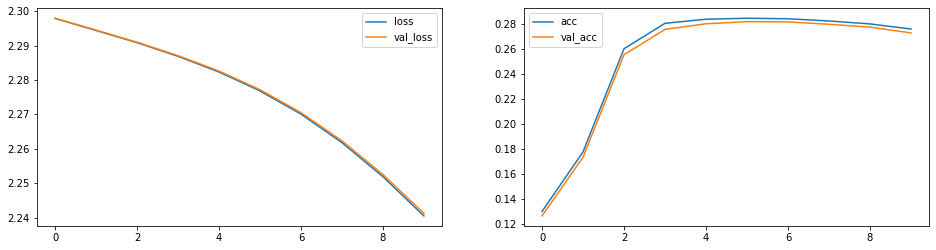

In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

## Что мы можем улучшить? 
- Отнормировать признаки
- Заменить сигмоиды на ReLu
- Задать правила инициации весов

### Нормировка
![picture](https://drive.google.com/uc?export=view&id=1cZ12oLwDToKVev2bdTvzzNoFVOU_jKYn)

In [ ]:
# Ваш код здесь


In [ ]:
x_train_norm.max(), x_train_norm.min()

(tensor(2.0224), tensor(-0.8103))

In [ ]:
n_epochs = 10
batch_size = 1000 
learning_rate = 1e-1

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


100%|██████████| 60/60 [00:00<00:00, 88.87it/s]


Epoch 0: 
 Accuracy - train: 0.18328333333333333 | test: 0.1826 
 Loss - train: 2.2710161209106445 | test: 2.2713401317596436


100%|██████████| 60/60 [00:00<00:00, 87.57it/s]


Epoch 1: 
 Accuracy - train: 0.1904 | test: 0.1896 
 Loss - train: 2.2610533237457275 | test: 2.261446952819824


100%|██████████| 60/60 [00:00<00:00, 89.63it/s]


Epoch 2: 
 Accuracy - train: 0.1953 | test: 0.1943 
 Loss - train: 2.250746726989746 | test: 2.2511985301971436


100%|██████████| 60/60 [00:00<00:00, 88.41it/s]


Epoch 3: 
 Accuracy - train: 0.20195 | test: 0.2015 
 Loss - train: 2.240670919418335 | test: 2.241175413131714


100%|██████████| 60/60 [00:00<00:00, 88.89it/s]


Epoch 4: 
 Accuracy - train: 0.2139 | test: 0.2118 
 Loss - train: 2.2312819957733154 | test: 2.23183536529541


100%|██████████| 60/60 [00:00<00:00, 90.17it/s]


Epoch 5: 
 Accuracy - train: 0.22675 | test: 0.2244 
 Loss - train: 2.22271466255188 | test: 2.223322629928589


100%|██████████| 60/60 [00:00<00:00, 89.43it/s]


Epoch 6: 
 Accuracy - train: 0.23685 | test: 0.2337 
 Loss - train: 2.21484375 | test: 2.215510845184326


100%|██████████| 60/60 [00:00<00:00, 89.53it/s]


Epoch 7: 
 Accuracy - train: 0.24585 | test: 0.2443 
 Loss - train: 2.2074553966522217 | test: 2.208186149597168


100%|██████████| 60/60 [00:00<00:00, 91.51it/s]


Epoch 8: 
 Accuracy - train: 0.25366666666666665 | test: 0.2527 
 Loss - train: 2.2003328800201416 | test: 2.201122999191284


100%|██████████| 60/60 [00:00<00:00, 90.61it/s]


Epoch 9: 
 Accuracy - train: 0.2601833333333333 | test: 0.2591 
 Loss - train: 2.1933019161224365 | test: 2.1941463947296143


In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

### Инициациия весов
__Случайно__  
$ w = a * random$, но тогда если $a \gg 1$, то на выходе $b\gg1$ и если $a \ll 1 $, то $b \approx 0 $  

__Xavier__  
$a = \frac{1}{\sqrt{n}}$, где $n$ - кол-во нейронов на входе

__He__  
$a = \frac{1}{\sqrt{\frac{n}{2}}}$, где $n$ - кол-во нейронов на входе

In [ ]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

Примените к модели  функцию инициации весов с помощью метода .apply()

In [ ]:
model_2 = Model()

In [ ]:
model_2 = model_2.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
n_epochs = 10
batch_size = 1000
learning_rate = 1e-1

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_2, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


100%|██████████| 60/60 [00:00<00:00, 94.64it/s]


Epoch 0: 
 Accuracy - train: 0.5116166666666667 | test: 0.509 
 Loss - train: 1.967336893081665 | test: 1.9707343578338623


100%|██████████| 60/60 [00:00<00:00, 94.78it/s]


Epoch 1: 
 Accuracy - train: 0.5305833333333333 | test: 0.5295 
 Loss - train: 1.9361932277679443 | test: 1.9385879039764404


100%|██████████| 60/60 [00:00<00:00, 93.04it/s]


Epoch 2: 
 Accuracy - train: 0.61525 | test: 0.6122 
 Loss - train: 1.8624768257141113 | test: 1.865403652191162


100%|██████████| 60/60 [00:00<00:00, 94.29it/s]


Epoch 3: 
 Accuracy - train: 0.6271 | test: 0.6214 
 Loss - train: 1.8435945510864258 | test: 1.8472692966461182


100%|██████████| 60/60 [00:00<00:00, 90.32it/s]


Epoch 4: 
 Accuracy - train: 0.6320666666666667 | test: 0.6258 
 Loss - train: 1.8354830741882324 | test: 1.839479684829712


100%|██████████| 60/60 [00:00<00:00, 93.47it/s]


Epoch 5: 
 Accuracy - train: 0.6353833333333333 | test: 0.6299 
 Loss - train: 1.8293960094451904 | test: 1.833376407623291


100%|██████████| 60/60 [00:00<00:00, 92.60it/s]


Epoch 6: 
 Accuracy - train: 0.7296333333333334 | test: 0.7217 
 Loss - train: 1.7447209358215332 | test: 1.7505550384521484


100%|██████████| 60/60 [00:00<00:00, 92.78it/s]


Epoch 7: 
 Accuracy - train: 0.7333 | test: 0.7251 
 Loss - train: 1.7368966341018677 | test: 1.7430294752120972


100%|██████████| 60/60 [00:00<00:00, 93.89it/s]


Epoch 8: 
 Accuracy - train: 0.7353 | test: 0.727 
 Loss - train: 1.7319482564926147 | test: 1.7382607460021973


100%|██████████| 60/60 [00:00<00:00, 93.54it/s]


Epoch 9: 
 Accuracy - train: 0.7895333333333333 | test: 0.7783 
 Loss - train: 1.685734748840332 | test: 1.6962037086486816


In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

### Функции активации
![picture](https://drive.google.com/uc?export=view&id=1E-p46g_GUEV4Z87-Ys9pwIn8_ZvyZW0s)

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()


    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

model_3 = Model()

In [ ]:
n_epochs = 10
batch_size = 1000 
learning_rate = 1e-1

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_3, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


100%|██████████| 60/60 [00:00<00:00, 93.40it/s]


Epoch 0: 
 Accuracy - train: 0.15443333333333334 | test: 0.1555 
 Loss - train: 2.277034044265747 | test: 2.277655839920044


100%|██████████| 60/60 [00:00<00:00, 91.83it/s]


Epoch 1: 
 Accuracy - train: 0.31461666666666666 | test: 0.3137 
 Loss - train: 2.191441059112549 | test: 2.193312644958496


100%|██████████| 60/60 [00:00<00:00, 93.45it/s]


Epoch 2: 
 Accuracy - train: 0.5443833333333333 | test: 0.5435 
 Loss - train: 1.9746153354644775 | test: 1.9758939743041992


100%|██████████| 60/60 [00:00<00:00, 90.17it/s]


Epoch 3: 
 Accuracy - train: 0.5541 | test: 0.5524 
 Loss - train: 1.9210067987442017 | test: 1.922302484512329


100%|██████████| 60/60 [00:00<00:00, 92.23it/s]


Epoch 4: 
 Accuracy - train: 0.5586166666666667 | test: 0.5585 
 Loss - train: 1.9060847759246826 | test: 1.9073197841644287


100%|██████████| 60/60 [00:00<00:00, 90.47it/s]


Epoch 5: 
 Accuracy - train: 0.5610333333333334 | test: 0.5601 
 Loss - train: 1.8958685398101807 | test: 1.8975919485092163


100%|██████████| 60/60 [00:00<00:00, 92.01it/s]


Epoch 6: 
 Accuracy - train: 0.5742 | test: 0.5741 
 Loss - train: 1.8845248222351074 | test: 1.8860154151916504


100%|██████████| 60/60 [00:00<00:00, 89.59it/s]


Epoch 7: 
 Accuracy - train: 0.6312666666666666 | test: 0.63 
 Loss - train: 1.857607364654541 | test: 1.8584785461425781


100%|██████████| 60/60 [00:00<00:00, 91.09it/s]


Epoch 8: 
 Accuracy - train: 0.6350833333333333 | test: 0.6346 
 Loss - train: 1.839447259902954 | test: 1.8399618864059448


100%|██████████| 60/60 [00:00<00:00, 89.64it/s]


Epoch 9: 
 Accuracy - train: 0.63915 | test: 0.6384 
 Loss - train: 1.8312550783157349 | test: 1.832215666770935


In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

## Влияние скорости обучения
Посмотрим, как влияет параметр `learning_rate` на качество нашей модели на обучающей выборке

In [ ]:
learning_rates = [1e+1, 1e-2, 1e-3, 1e-5, 1e-10] 

In [ ]:
voc_loss_train = {}
batch_size = 5000

for i in learning_rates:
    model_2.apply(init_weights)
    acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_2, 25, batch_size, i,
                                                                       x_train_flat, y_train, x_test_flat, y_test)
    voc_loss_train[i] = loss_train_all

In [ ]:
fig = plt.figure(figsize=(16, 4))

for i in voc_loss_train.keys():
    plt.plot(voc_loss_train[i], label=f'{i}')


plt.legend()
plt.show()

## Влияние метода оптимизации градиентного спуска

![picture](https://drive.google.com/uc?export=view&id=1wYGptX72S3sB4K21ktZzbqojHjssZ0xP)

#### Momentum
Вместо того, чтобы использовать только градиент текущего шага, мы будем накапливать импульс градиента прошлых шагов для определения направления движения. 
В связи со стохастической природой, обновления градиента происходят "зигзагообразно", с помощью момента мы усиливаем движение вдоль основного направления. На практике коэффициент у момента инициализируется на уровне 0,5 и постепенно увеличивается до 0,9 в течение нескольких эпох. 
  
#### RMSProp (Root Mean Square Propogation)   
Мы обновляяем меньше веса, которые слишком часто обновляются, и будем использовать усреднённый по истории квадрат градиента.

#### Adam (Adaptive moment estimation)
Cочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков

In [ ]:
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.0)

In [ ]:
def batch_train(model, x, y):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    model.zero_grad()
    loss.backward()
    #    with torch.no_grad():
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad
    optimizer.step()
    return(loss.item())

In [ ]:
n_epochs = 100
batch_size = 1000


model_2.apply(init_weights)
loss_train_sgd = []

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.0)

for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_sgd = np.append(loss_train_sgd, loss_train)

    
model_2.apply(init_weights)
loss_train_sgd_moment = []

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)

for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_sgd_moment = np.append(loss_train_sgd_moment, loss_train)
    
    

model_2.apply(init_weights)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
loss_train_adam = []


for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_adam = np.append(loss_train_all, loss_train)

In [ ]:
fig = plt.figure(figsize=(16, 4))

plt.plot(loss_train_sgd, label='SGD')
plt.plot(loss_train_sgd_moment, label='SGD with momentum')
plt.plot(loss_train_adam, label='Adam')

plt.legend()
plt.show()

# Ссылки
- [Курс "Deep learning на пальцах", лекция 4](https://youtu.be/tnrbx7V9RbA)
- [Статья: Оптимизация градиентного спуска](http://ruder.io/optimizing-gradient-descent/)
- [Статья: Методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/)